In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [2]:
# seq_data for LSTM
actions = [
           'rock',
           'scissors',
           'paper'
]

data = np.concatenate([
                       np.load('/content/drive/MyDrive/Mediapipe data/seq_rock_1634267024.npy'),
                       np.load('/content/drive/MyDrive/Mediapipe data/seq_scissors_1634267024.npy'),
                       np.load('/content/drive/MyDrive/Mediapipe data/seq_paper_1634267024.npy')
], axis=0)
'''

rock (871, 30, 100)

scissors (872, 30, 100)

paper (863, 30, 100)
'''

data.shape

(2606, 30, 100)

In [ ]:
np.load('/content/drive/MyDrive/Mediapipe data/seq_rock_1634267024.npy')[1]

array([[ 0.69555861,  0.69363856,  0.        , ..., 92.98734283,
        70.88996887,  0.        ],
       [ 0.69543427,  0.70178771,  0.        , ..., 95.82356262,
        65.22275543,  0.        ],
       [ 0.69347948,  0.70475602,  0.        , ..., 91.08642578,
        66.89812469,  0.        ],
       ...,
       [ 0.70497614,  0.72212875,  0.        , ..., 79.53955841,
        95.42293549,  0.        ],
       [ 0.70244306,  0.72867149,  0.        , ..., 78.78663635,
        92.08789062,  0.        ],
       [ 0.70253354,  0.72403693,  0.        , ..., 88.99760437,
        84.28774261,  0.        ]])

In [3]:
# numpy array (= 21개의 랜드마크 visibility, 15개의 손가락 각도, 63개의 랜드마크 데이터 )
X_data = data[:, :, :-1]

# labels = [0., 1., 2.]
labels = data[:, 0, -1]

print(X_data.shape, labels.shape)

(2606, 30, 99) (2606,)


In [4]:
labels

array([0., 0., 0., ..., 2., 2., 2.])

In [ ]:
# labels to_categorical( num_classes= total number of class, dtype = float32 default)

y_data = to_categorical(labels, num_classes=len(actions))
print(y_data)
print(y_data.shape)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(2606, 3)


In [ ]:
# ML모델 연산을 위해서 float64 -> float32
X_data = X_data.astype(np.float32)
#y_data = y_data.astype(np.float32)

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.1, random_state=7)

# shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2345, 30, 99) (2345, 3)
(261, 30, 99) (261, 3)


In [ ]:
# LSTM
model = Sequential([
                    LSTM(64, activation='relu', input_shape=X_train.shape[1:3]),
                    Dense(32, activation='relu'),
                    Dense(3, activation='softmax')
])
                    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                41984     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


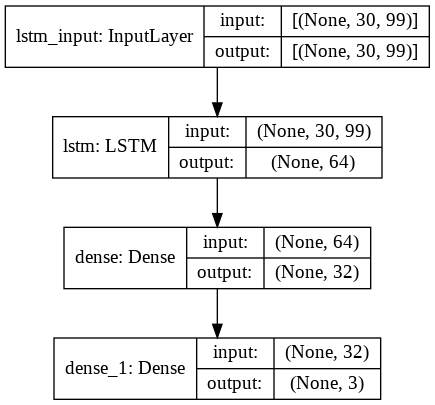

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
# 학습한 모델 저장
cheak_point = ModelCheckpoint('LSTM_Model.h5',
                              monitor='val_acc',   # val_acc 값이 개선되었을때 호출
                              verbose=1,            # 로그를 출력
                              save_best_only=True,  # 가장 best 값만 저장
                              mode='auto')           # auto는 알아서 best 찾는다 min/max

early_stop = EarlyStopping(monitor='val_acc',min_delta=0.0001, patience=3)

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100,
                    callbacks=[cheak_point, early_stop])

Epoch 1/100
74/74 [==============================] - 7s 92ms/step - loss: 1.3002e-07 - acc: 1.0000 - val_loss: 0.0466 - val_acc: 0.9962

Epoch 00001: val_acc improved from -inf to 0.99617, saving model to LSTM_Model.h5
Epoch 2/100
74/74 [==============================] - 7s 92ms/step - loss: 1.2590e-07 - acc: 1.0000 - val_loss: 0.0466 - val_acc: 0.9962

Epoch 00002: val_acc did not improve from 0.99617
Epoch 3/100
74/74 [==============================] - 7s 93ms/step - loss: 1.2169e-07 - acc: 1.0000 - val_loss: 0.0466 - val_acc: 0.9962

Epoch 00003: val_acc did not improve from 0.99617
Epoch 4/100
74/74 [==============================] - 7s 88ms/step - loss: 1.1787e-07 - acc: 1.0000 - val_loss: 0.0466 - val_acc: 0.9962

Epoch 00004: val_acc did not improve from 0.99617


In [ ]:
# early_stop 사용 X
cheak_point = ModelCheckpoint('LSTM_Model2.h5',
                              monitor='val_acc',   # val_acc 값이 개선되었을때 호출
                              verbose=1,            # 로그를 출력
                              save_best_only=True,  # 가장 best 값만 저장
                              mode='auto')           # auto는 알아서 best 찾는다 min/max

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30,
                    callbacks=[cheak_point])

Epoch 1/30
74/74 [==============================] - 8s 97ms/step - loss: 47.8951 - acc: 0.6486 - val_loss: 24.8644 - val_acc: 0.7510

Epoch 00001: val_acc improved from -inf to 0.75096, saving model to LSTM_Model2.h5
Epoch 2/30
74/74 [==============================] - 7s 92ms/step - loss: 22.4987 - acc: 0.6299 - val_loss: 4.8023 - val_acc: 0.8659

Epoch 00002: val_acc improved from 0.75096 to 0.86590, saving model to LSTM_Model2.h5
Epoch 3/30
74/74 [==============================] - 7s 92ms/step - loss: 8.1256 - acc: 0.7574 - val_loss: 9.0694 - val_acc: 0.7701

Epoch 00003: val_acc did not improve from 0.86590
Epoch 4/30
74/74 [==============================] - 6s 88ms/step - loss: 8.8013 - acc: 0.7936 - val_loss: 2.0943 - val_acc: 0.7854

Epoch 00004: val_acc did not improve from 0.86590
Epoch 5/30
74/74 [==============================] - 7s 90ms/step - loss: 0.7976 - acc: 0.9049 - val_loss: 0.8967 - val_acc: 0.8123

Epoch 00005: val_acc did not improve from 0.86590
Epoch 6/30
74/74 [

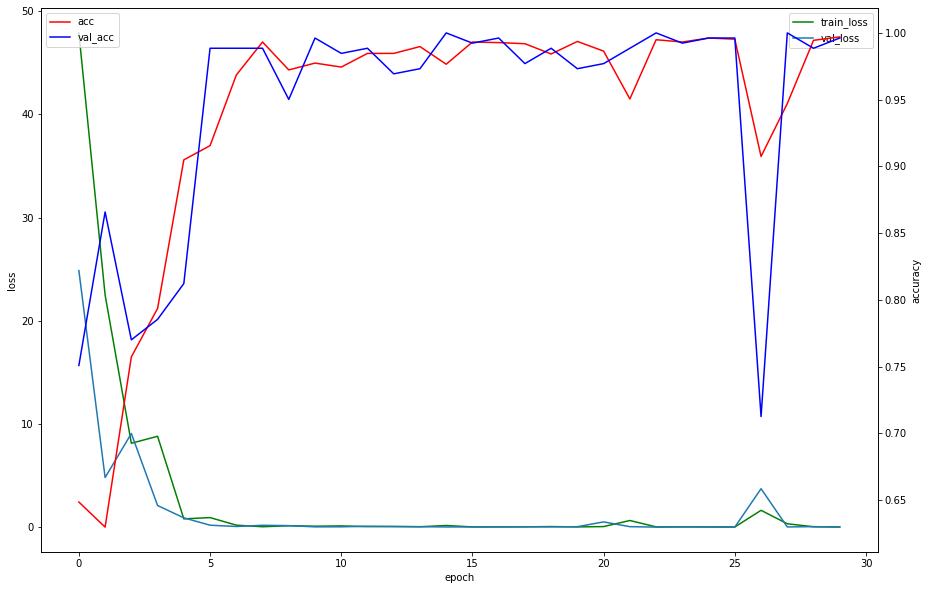

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
# y축에 acc범례 추가(legend 한번 더 추가)
acc_ax = ax.twinx()
ax.plot(history.history['loss'], color='green', label='train_loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend()

acc_ax.plot(history.history['acc'], color= 'red', label='acc')
acc_ax.plot(history.history['val_acc'], color='blue', label='val_acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend()
plt.show()

In [ ]:
# acc 99% 나옴, early_stop 사용 안 할 시 acc 100%
# 다중 레이블의 경우에는 multilabel confusion matrix 사용
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# early stop
model = load_model('LSTM_Model.h5')
# early stop X
model2 = load_model('LSTM_Model2.h5')

y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

In [ ]:
# confusion matrix는 원-핫 인코딩된 벡터가 아닌 한 자리 숫자로 필요
# y_test는 여전히 원-핫 인코딩되어 있고 
# y_pred에서 확률이 높은것만 비교하면 되기때문에 배열의 데이터 중 최대값의 인덱스를 반환
# axis= 0,1,2(= x축, y축, z축)
'''
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.argmax(a)
5
>>> np.argmax(a, axis=0)
array([1, 1, 1])
>>> np.argmax(a, axis=1)
array([2, 2])
'''
# early stop
y_pred_max=np.argmax(y_pred, axis=1)
y_test_max=np.argmax(y_test, axis=1)
# early stop X
y_pred_max2=np.argmax(y_pred2, axis=1)
y_test_max2=np.argmax(y_test, axis=1)

In [ ]:
# x축 model predict value / y축 True label value
multilabel_confusion_matrix(y_test_max, y_pred_max)

array([[[171,   0],
        [  1,  89]],

       [[175,   1],
        [  0,  85]],

       [[175,   0],
        [  0,  86]]])

In [ ]:
multilabel_confusion_matrix(y_test_max2, y_pred_max2)

array([[[171,   0],
        [  0,  90]],

       [[176,   0],
        [  0,  85]],

       [[175,   0],
        [  0,  86]]])